## Aufgabe 2

In [638]:
import numpy as np
import nnwplot

iris = np.loadtxt("iris.csv", delimiter=",")

In [639]:
def ErrorRate(Y, T):
    if Y.ndim == 1 or Y.shape[0] == 1:
        errors = Y != T
        return errors.sum() / Y.size
    else:  # für mehrere Ausgaben in one-hot Kodierung:
        # Dies brauchen Sie jetzt noch nicht nachzuvollziehen.
        errors = Y.argmax(0) != T.argmax(0)
        return errors.sum() / Y.shape[1]

In [640]:
class SLN:

    def __init__(self, dIn, cOut):
        np.random.seed(42)
        self._W = np.random.randn(cOut, dIn) / np.sqrt(dIn)
        self._b = np.zeros((cOut, 1))
        if cOut == 1:
            self.neuron = self.threshold
        else:
            self.neuron = self.thresholdMult

    def onehot(self, T):
        e = np.identity(self._W.shape[0])
        return e[:, T.astype(int)]

    def netsum(self, X):
        return self._W.dot(X) + self._b

    def threshold(self, X):
        return self.netsum(X) >= 0

    def thresholdMult(self, X):
        # calculate for multiple classes
        net_sum = self.netsum(X)
        onehot = np.argmax(net_sum, axis=0)
        oh = self.onehot(onehot)
        return oh

    def deltaTrain(self, X, T, eta, maxIter, maxErrorRate):
        n_samples = X.shape[1]
        min_error = n_samples
        for epoch in range(maxIter):
            # Neuron Ergebnis
            Y = self.neuron(X)
            delta = (T - Y).T

            # Aktualisierung von W
            Wd = (X @ delta) / n_samples

            self._W += eta * Wd.T

            # Aktualisierung des Bias
            db = eta * np.mean(delta, axis=0, keepdims=True)
            self._b += db.T

            error = ErrorRate(Y, T)
            if error < min_error:
                min_error = error
                min_error_epoch = epoch
            if error < maxErrorRate:
                print("maxErrorRate reached!")
                break
        print("Training finished in epoch", epoch + 1, "with error", error)
        print("Minimal error was", min_error, "and was reached in epoch", min_error_epoch + 1)


Training finished in epoch 10000 with error 0.04
Minimal error was 0.02 and was reached in epoch 1040


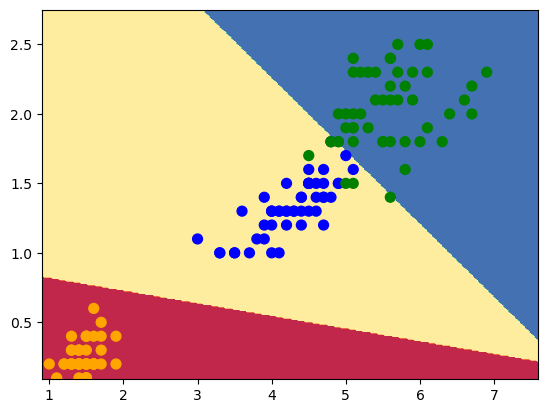

In [641]:
sln = SLN(2, 3)

X = iris[:, [2, 3]].T  # Merkmale 3 und 4
T = sln.onehot(np.array(iris[:, 4]))  # One-Hot Kodierung des Targets

sln.deltaTrain(X, T, 0.2, 10000, 0.01)
nnwplot.plotTwoFeatures(X, T, sln.neuron)

#### c)

Lernrate: ```eta = 0.2```

Der kleinste Fehler war 0.02 und wurde bei der Epoche 1040 erreicht.
Terminiert hat das Modell allerdings nach 10.000 Epochen mit einem Fehler von 0.04